<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">TFM - UEBA: Detección de Anomalías</p>
<p style="margin: 0; text-align:right;">20231 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Alejandro Ortega de los Ríos
</div>

# Extracción de características - Email

In [1]:
# Librerías básicas
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
insiders_df = pd.read_csv('../data/answers/insiders.csv')

#Filtro por versión del dataset de CERT
insiders_df = insiders_df[insiders_df['dataset'] == 4.2]
insiders_df = insiders_df.drop(columns=['dataset']).reset_index(drop=True)

#Lista de insiders por nombre de usuario
insiders_list = insiders_df['user'].to_list()

In [3]:
email_df = pd.read_csv('../data/email.csv')

In [4]:
email_df.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [22]:
columns = ['to', 'cc', 'bcc', 'from']
nan_exists = email_df[columns].isnull().any()

print("Variables con valores Nan:")

for column, has_nan in nan_exists.items():
    if has_nan:
        print("   - Variable {}".format(column))

Variables con valores Nan:
   - Variable cc
   - Variable bcc


En este caso los valores Nan no es necesario tratarlos. Es común mandar correos sin destinatarios de copia.

### 1.1. Ficheros adjuntos

In [6]:
email_size = email_df.groupby('user')['size'].mean()
attachments_count = email_df.groupby('user')['attachments'].mean()

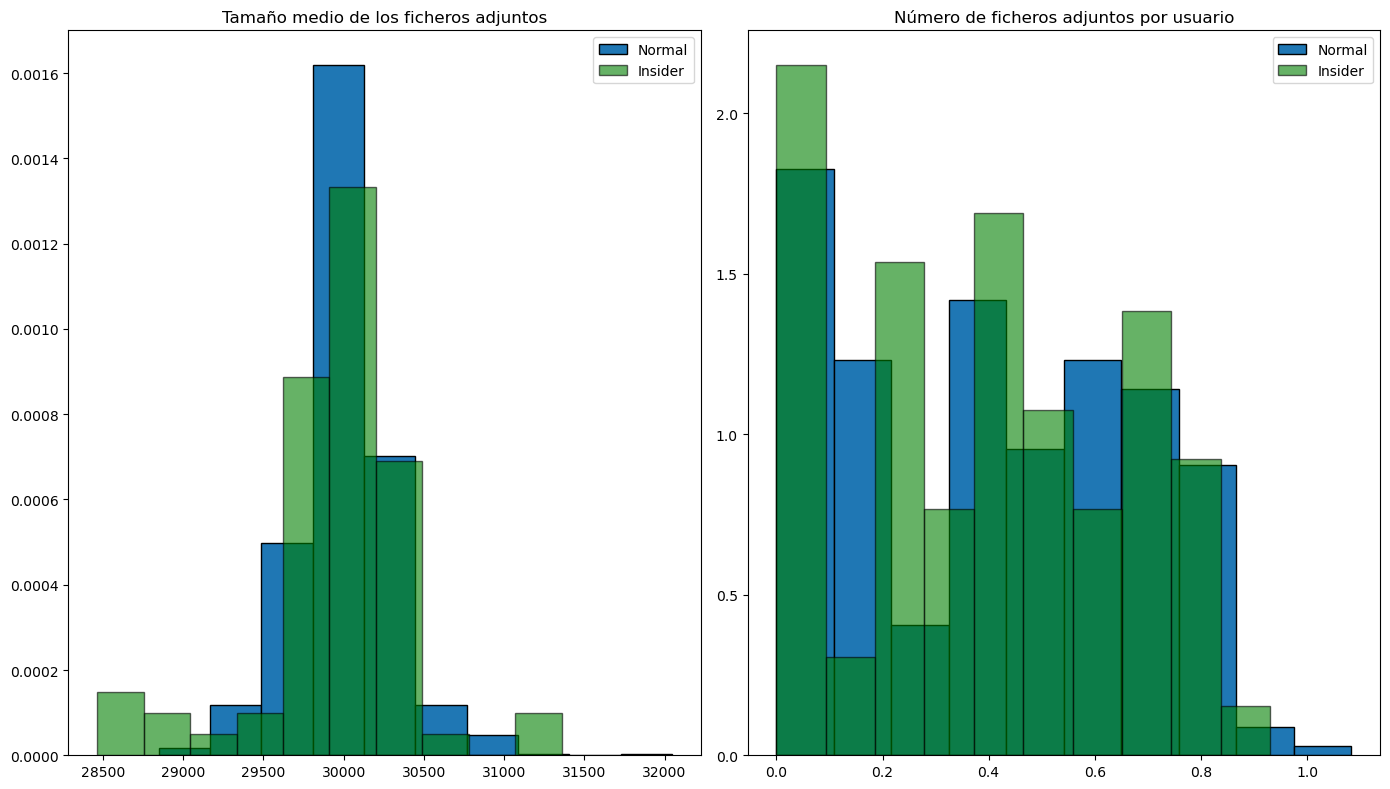

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

#Tamaño medio de los ficheros adjuntos
ax[0].hist(email_size[~email_size.index.isin(insiders_list)], edgecolor='black', density=True, label='Normal')
ax[0].hist(email_size[insiders_list], edgecolor='black', color='green', alpha=0.6, density=True, label='Insider')
ax[0].set_title("Tamaño medio de los ficheros adjuntos")
ax[0].legend()

#Número de ficheros adjuntos por usuario
ax[1].hist(attachments_count[~attachments_count.index.isin(insiders_list)], edgecolor='black', density=True, label='Normal')
ax[1].hist(attachments_count[insiders_list], edgecolor='black', color='green', alpha=0.6, density=True, label='Insider')
ax[1].set_title("Número de ficheros adjuntos por usuario")
ax[1].legend()

plt.tight_layout()
plt.show()

### 1.2. Número de destinatarios por usuario

In [9]:
#Recuento de destinatarios
email_df['to_counts'] = email_df['to'].str.split(';').apply(len)
email_df['cc_counts'] = email_df['cc'].fillna('').str.split(';').apply(len)
email_df['bcc_counts'] = email_df['bcc'].fillna('').str.split(';').apply(len)

In [10]:
# Calcular el valor medio de cada uno de los conteos por usuario
media_to_counts_por_usuario = email_df.groupby('user')['to_counts'].mean()
media_cc_counts_por_usuario = email_df.groupby('user')['cc_counts'].mean()
media_bcc_counts_por_usuario = email_df.groupby('user')['bcc_counts'].mean()

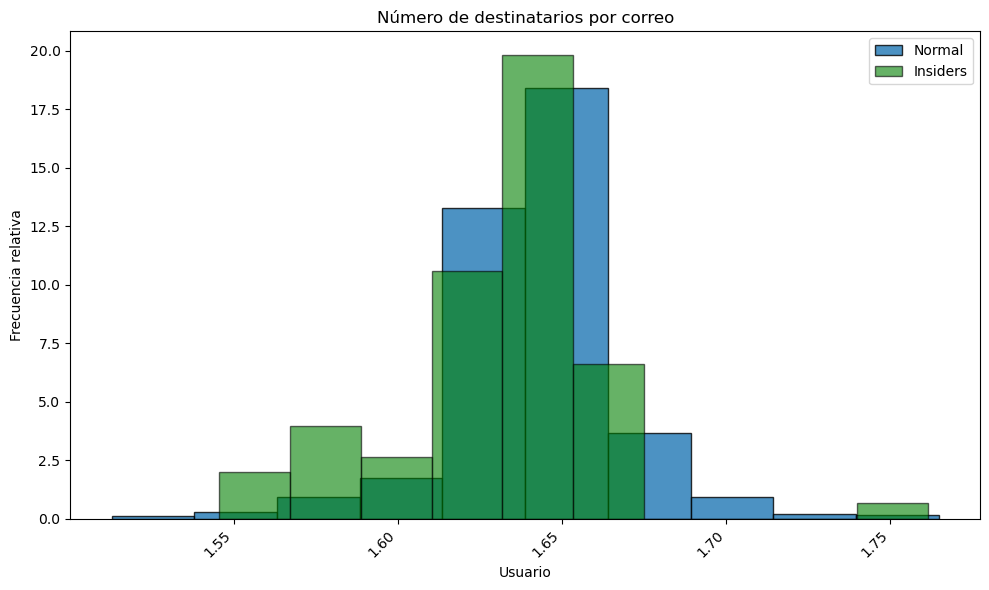

In [11]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
media_to_counts_por_usuario.plot(kind='hist', edgecolor='black', alpha=0.8, label='Normal', density=True)
media_to_counts_por_usuario[insiders_list].plot(kind='hist', edgecolor='black', color='green', alpha=0.6, label='Insiders', density=True)
plt.xlabel('Usuario')
plt.ylabel('Frecuencia relativa')
plt.title('Número de destinatarios por correo')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 1.3. Número de Correos enviados al día

C:\Users\alexo\AppData\Local\Temp\ipykernel_22932\2260583332.py:33: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  axes[1].hist(weekend_emails[weekend_insiders], edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')


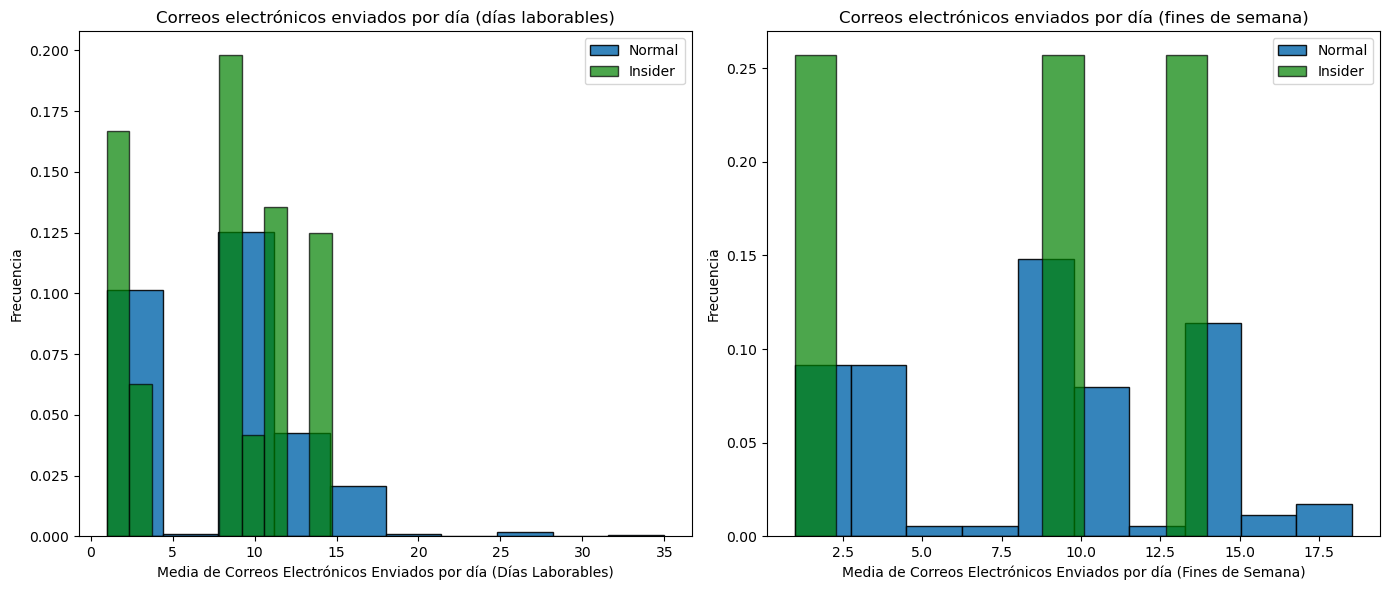

In [12]:
#Emails diarios. Obtengo la hora y la fecha
email_df['date'] = pd.to_datetime(email_df['date'], format='%m/%d/%Y %H:%M:%S')
email_df['time'] = email_df['date'].dt.strftime('%H:%M:%S')
email_df['date'] = email_df['date'].dt.floor('d')

# Extraer el día de la semana (0: lunes, 1: martes, ..., 6: domingo)
email_df['weekday'] = pd.to_datetime(email_df['date']).dt.weekday

# Filtrar solo los días laborables
working_days_emails = email_df[(email_df['weekday'] != 5) & (email_df['weekday'] != 6)]
weekend_emails = email_df[(email_df['weekday'] == 5) | (email_df['weekday'] == 6)]

#No todos los insiders trabajan el fin de semana
weekend_insiders = set(weekend_emails['user'].unique().tolist()) & set(insiders_list)

# Calcular el número de correos electrónicos enviados por día durante los fines de semana y laborables por usuario
working_days_emails = working_days_emails.groupby(['user', 'date']).size().groupby('user').mean()
weekend_emails = weekend_emails.groupby(['user', 'date']).size().groupby('user').mean()

# Crear los histogramas para días laborables y fines de semana
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histograma para días laborables
axes[0].hist(working_days_emails[~working_days_emails.index.isin(insiders_list)], edgecolor='black', alpha=0.9, density=True, label='Normal')
axes[0].hist(working_days_emails[insiders_list], edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
axes[0].set_xlabel('Media de Correos Electrónicos Enviados por día (Días Laborables)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Correos electrónicos enviados por día (días laborables)')
axes[0].legend()

# Histograma para fines de semana
axes[1].hist(weekend_emails[~weekend_emails.index.isin(insiders_list)], edgecolor='black', alpha=0.9, density=True, label='Normal')
axes[1].hist(weekend_emails[weekend_insiders], edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
axes[1].set_xlabel('Media de Correos Electrónicos Enviados por día (Fines de Semana)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Correos electrónicos enviados por día (fines de semana)')
axes[1].legend()

plt.tight_layout()
plt.show()


### 1.4. Número de emails de cada usuario

In [13]:
emails_per_user = email_df.groupby('user')['from'].nunique()

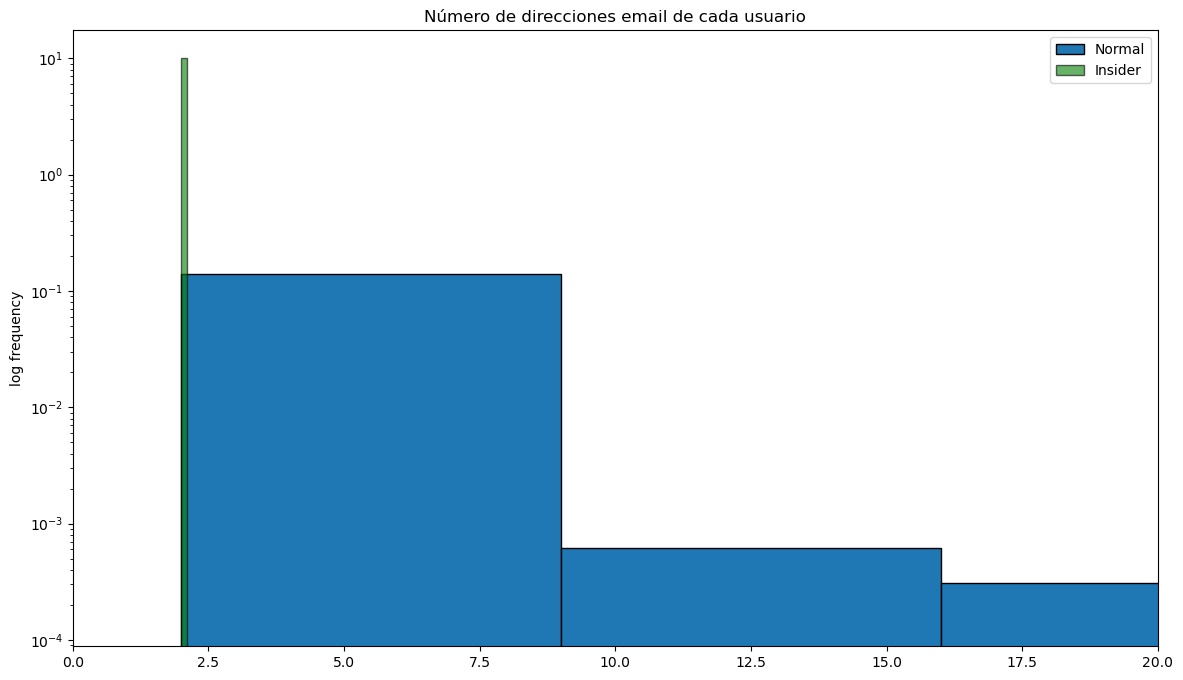

In [14]:
# Creo subgráficos para los histogramas

# Primer histograma: Tamaño medio de los ficheros adjuntos
plt.figure(figsize=(14, 8))
plt.hist(emails_per_user[~emails_per_user.index.isin(insiders_list)], edgecolor='black', density=True, label='Normal')
plt.hist(emails_per_user[insiders_list], edgecolor='black', color='green', alpha=0.6, density=True, label='Insider')
plt.title("Número de direcciones email de cada usuario")
plt.xlim(0, 20)
plt.yscale('log')
plt.ylabel('log frequency')

plt.legend()
plt.show()

## 2. Espacio de Características

A continuación voy a generar un dataset, que representará el espacio de características de los usuarios. Añadiré como variable objetivo 'insider', que permitirá entrenar algoritmos supervisados, así como validar los resultados.

In [15]:
features = pd.DataFrame()

In [16]:
#Características
features['user'] = email_df['user'].unique()
features['email_size'] = email_size.to_list()
features['attachments'] = attachments_count.to_list()
features['recipients'] = media_to_counts_por_usuario.to_list()
features['working_day_emails'] = working_days_emails.to_list()
features['address_count'] = emails_per_user.to_list()

# Creo un diccionario
weekend_emails_dict = weekend_emails.to_dict()

# Mapeo diccinario. Le asigno valor si el usuario existe en weekend_emails_dict, y cero en caso contrario
features['weekend_emails'] = features['user'].map(weekend_emails_dict).fillna(0).astype(int)

In [17]:
features['insider'] = features['user'].isin(insiders_list).astype(int)

In [18]:
features.head()

,user,email_size,attachments,recipients,working_day_emails,address_count,weekend_emails,insider
0,LAP0338,30020.394184,0.377839,1.638930,13.655072,2,2,0
1,MOH0273,30397.402083,0.758333,1.670833,2.962963,2,8,0
2,HVB0037,29958.497676,0.000000,1.658367,8.705202,3,13,0
3,NWK0215,29828.181548,0.431548,1.651786,1.000000,2,12,0
4,LRR0148,29895.532625,0.930197,1.587253,2.941964,2,13,0


In [19]:
#Guardo el fichero
features.to_csv('features.csv')